In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

import operator
import unicodedata
import string
from bs4 import BeautifulSoup

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# import xgboost as xgb
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from src.EDA import *

In [2]:
# autoreload python file to take in changes from outside notebook
%load_ext autoreload
%autoreload 2

# EDA

In [162]:
df = pd.read_csv('sephora_review_db.csv.zip')

In [163]:
df.shape

(276072, 22)

Columns of interest based on the below columns include: 'brand', 'name', 'brand_id', 'brand_image_url', 'product_id', 'rating', 'skin_type', 'eye_color', 'skin_concerns', 'skin_tone', 'age', 'review_text', 'price', 'recommended', 'description'

In [164]:
df.columns

Index(['brand', 'name', 'brand_id', 'brand_image_url', 'product_id',
       'product_image_url', 'rating', 'skin_type', 'eye_color',
       'skin_concerns', 'incentivized_review', 'skin_tone', 'age',
       'beauty_insider', 'user_name', 'review_text', 'price', 'recommended',
       'first_submission_date', 'last_submission_date', 'location',
       'description'],
      dtype='object')

In [165]:
# instantiate class
sephora_EDA = EDA()

Check to see how many missing values there are in the data

In [166]:
sephora_EDA.missing_zero_values_table(df)

Your selected dataframe has 22 columns and 276072 Rows.
There are 10 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
skin_concerns,0,205155,74.3,205155,74.3,object
incentivized_review,75375,196593,71.2,271968,98.5,object
recommended,17083,194300,70.4,211383,76.6,object
beauty_insider,0,165061,59.8,165061,59.8,object
location,0,162276,58.8,162276,58.8,object
age,0,156495,56.7,156495,56.7,object
skin_type,0,141630,51.3,141630,51.3,object
eye_color,0,98497,35.7,98497,35.7,object
skin_tone,0,93144,33.7,93144,33.7,object
user_name,0,2943,1.1,2943,1.1,object


In [167]:
df['skin_concerns'].value_counts()

acne               37539
aging              11881
blackheads          6075
darkCircles         5576
redness             2503
dullness            2088
unevenSkinTones     1619
sensitivity         1525
cellulite            635
sunDamage            547
pores                506
stretchMarks         141
cuticles             138
calluses             124
puffiness             20
Name: skin_concerns, dtype: int64

**The 2 columns of concern for modelling are 'review_text' and 'skin_types'. The other columns will be kept in for EDA purposes.**

In [168]:
'''check what kind of values are in the description. Some ingredient names are featured in the 
marketing/description of the product '''

# df['description'].unique()

'check what kind of values are in the description. Some ingredient names are featured in the \nmarketing/description of the product '

In [169]:
# # number of reviwers who recommeded products by rating
# recom_groups = df.groupby(['rating', 'recommended']).count()['review_text']
# recom_groups

In [170]:
# recom_groups.plot(kind='bar', stacked=False)

## Create dataframe with no NAs

**Any NaN values under the 'skin_type' and 'skin_concerns' column will be dropped**

In [187]:
df_no_na = df.dropna(subset=['skin_type', 'skin_concerns', 'skin_tone', 'eye_color'])
df_no_na.shape

(69479, 22)

In [188]:
sephora_EDA.missing_zero_values_table(df_no_na)

Your selected dataframe has 22 columns and 69479 Rows.
There are 5 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
incentivized_review,0,69479,100.0,69479,100.0,object
beauty_insider,0,69479,100.0,69479,100.0,object
location,0,69479,100.0,69479,100.0,object
age,0,64157,92.3,64157,92.3,object
user_name,0,325,0.5,325,0.5,object


In [189]:
df_no_na.head()

,brand,name,brand_id,brand_image_url,product_id,product_image_url,rating,skin_type,eye_color,skin_concerns,...,age,beauty_insider,user_name,review_text,price,recommended,first_submission_date,last_submission_date,location,description
0,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,6200,/contentimages/brands/fentybeauty/logo.jpg,P87985432,https://www.sephora.com/productimages/sku/s192...,4,oily,brown,acne,...,NaN,NaN,serena2304,Really good foundation I like it a lot but som...,$34.00,True,2018-01-06T01:04:26.000+00:00,2018-12-08T05:44:51.000+00:00,NaN,"What it is: A soft-matte, long-wear foundation..."
1,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,6200,/contentimages/brands/fentybeauty/logo.jpg,P87985432,https://www.sephora.com/productimages/sku/s192...,5,combination,brown,acne,...,NaN,NaN,emilyrerwin,"As someone who is very VERY fair, I have alway...",$34.00,True,2018-10-19T00:29:37.000+00:00,2018-12-07T15:16:13.000+00:00,NaN,"What it is: A soft-matte, long-wear foundation..."
2,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,6200,/contentimages/brands/fentybeauty/logo.jpg,P87985432,https://www.sephora.com/productimages/sku/s192...,5,combination,brown,darkCircles,...,NaN,NaN,BrowniexVixen,First purchase of a foundation of any kind. Wa...,$34.00,True,2018-02-05T21:40:40.000+00:00,2018-12-08T19:07:33.000+00:00,NaN,"What it is: A soft-matte, long-wear foundation..."
3,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,6200,/contentimages/brands/fentybeauty/logo.jpg,P87985432,https://www.sephora.com/productimages/sku/s192...,5,combination,brown,acne,...,NaN,NaN,KoKoDior,I absolutely love this foundation! I get compl...,$34.00,True,2018-05-09T00:32:04.000+00:00,2018-12-03T09:54:03.000+00:00,NaN,"What it is: A soft-matte, long-wear foundation..."
4,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,6200,/contentimages/brands/fentybeauty/logo.jpg,P87985432,https://www.sephora.com/productimages/sku/s192...,5,combination,green,darkCircles,...,NaN,NaN,kristaloveee,Love this foundation! I was using Too Faced Bo...,$34.00,True,2018-12-03T00:40:58.000+00:00,2018-12-06T02:32:21.000+00:00,NaN,"What it is: A soft-matte, long-wear foundation..."


In [190]:
df_no_na['recommended'] = np.where((df_no_na['recommended'] == True), 1, 0)

/Users/seanleong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


It would be interesting to see what the average rating is by brand

In [191]:
# average brand ratings 
brand_ratings = df_no_na.groupby(['brand']).mean()['rating'].reset_index()
brand_ratings.sort_values('rating', inplace=True)
brand_ratings.head()

,brand,rating
13,DERMAdoctor,3.000000
12,Cinema Secrets,3.000000
44,Pretty Vulgar,3.200000
42,Natasha Denona,3.469136
33,LAWLESS,3.601770


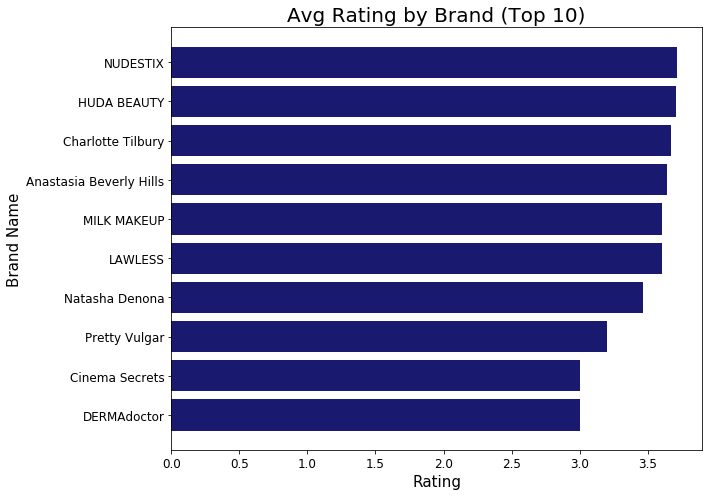

In [216]:
# plot brand and rating to see which brands have higher ratings
fig, ax = plt.subplots(figsize=(10,7))

ax.barh(brand_ratings['brand'][:10], brand_ratings['rating'][:10], color='midnightblue')
plt.title('Avg Rating by Brand (Top 10)', fontsize=20)
ax.set_xlabel('Rating', fontsize=15)
ax.set_ylabel('Brand Name', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

Are the highest rated brands also the brands with the highest number of reviews? It looks like this isn't the case. Fenty Beauty by Rihanna has the high number of reviews, but is not in the top 10 highest listed products.

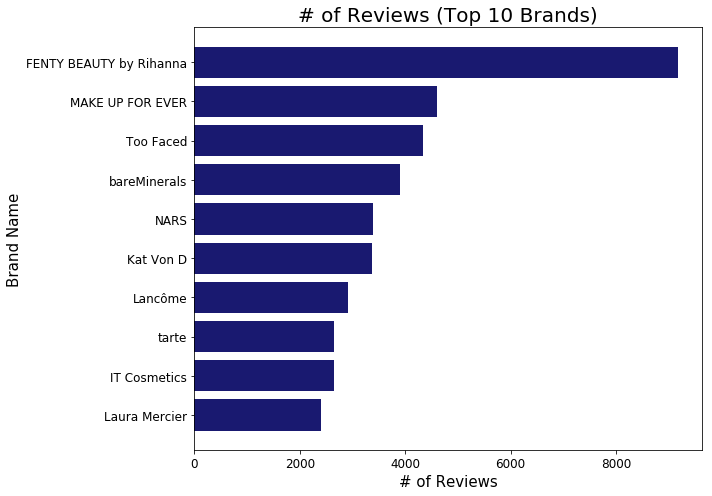

In [214]:
# number of reviews by brand
num_of_reviews_brand = df_no_na.groupby('brand').nunique()['review_text'].reset_index()
num_of_reviews_brand.sort_values('review_text', inplace=True)
# num_of_reviews_brand.head()

# plot brand and # of products per brand
fig, ax = plt.subplots(figsize=(10,7))

ax.barh(num_of_reviews_brand['brand'][-10:], num_of_reviews_brand['review_text'][-10:], color='midnightblue')
plt.title('# of Reviews (Top 10 Brands)', fontsize=20)
ax.set_xlabel('# of Reviews', fontsize=15)
ax.set_ylabel('Brand Name', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

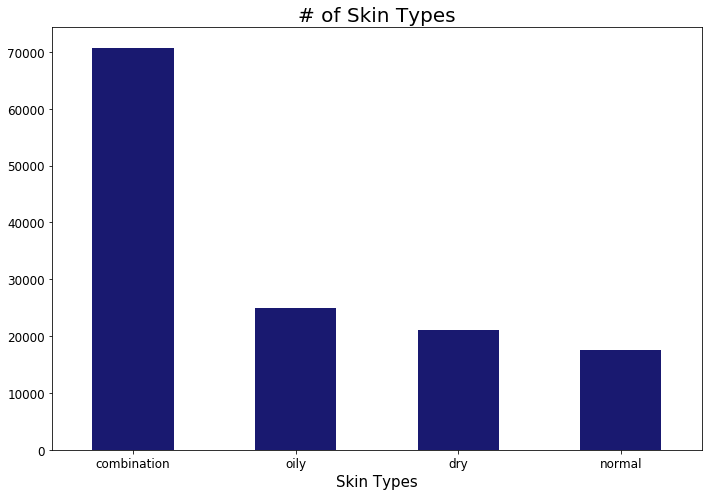

In [194]:
# number of people with certain skin type
sephora_EDA.plot_skin(df, 'skin_type', 'review_text')
plt.xlabel('Skin Types', fontsize=15)
plt.title('# of Skin Types', fontsize=20)
plt.tight_layout()
plt.savefig('imgs/skin_types.png');

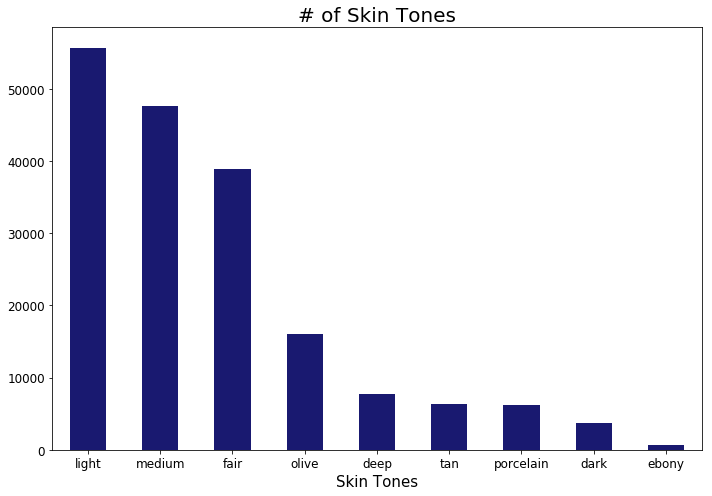

In [195]:
# number of people with different types of skin tones
sephora_EDA.plot_skin(df, 'skin_tone', 'review_text')
plt.xlabel('Skin Tones', fontsize=15)
plt.title('# of Skin Tones', fontsize=20)
plt.tight_layout()
plt.savefig('imgs/skin_tones.png');

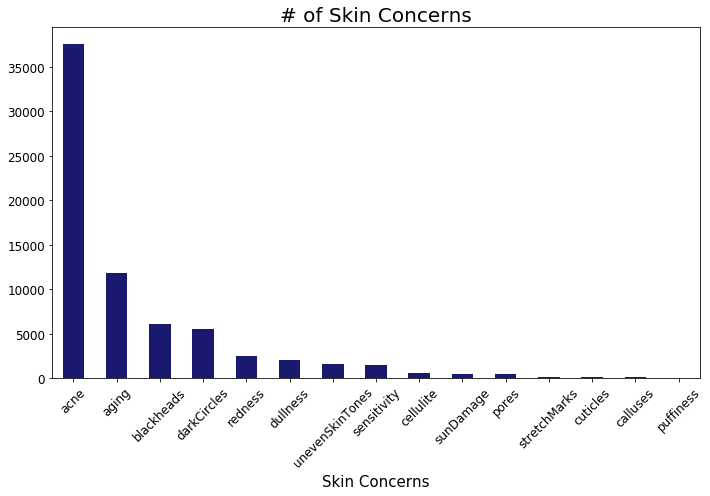

In [196]:
# number of people with different types of skin concerns
sephora_EDA.plot_skin(df, 'skin_concerns', 'review_text')
plt.xlabel('Skin Concerns', fontsize=15)
plt.xticks(rotation=45)
plt.title('# of Skin Concerns', fontsize=20)
plt.tight_layout()
plt.savefig('imgs/skin_concerns.png');

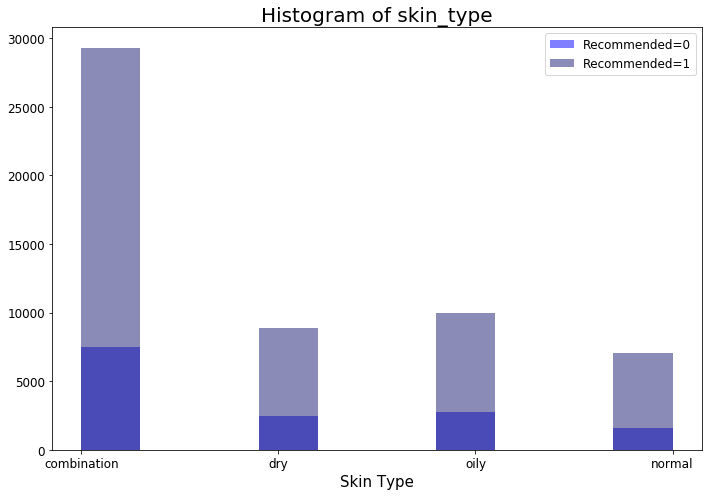

In [197]:
# fig, ax = plt.subplots(figsize=(10,7))
sephora_EDA.plot_histograms_by_outcome(df_no_na['skin_type'], df_no_na['recommended'], 'Recommended', 'Recommended')
plt.xlabel('Skin Type', fontsize=15)
plt.tight_layout()
plt.savefig('imgs/skin_type_rec.png')

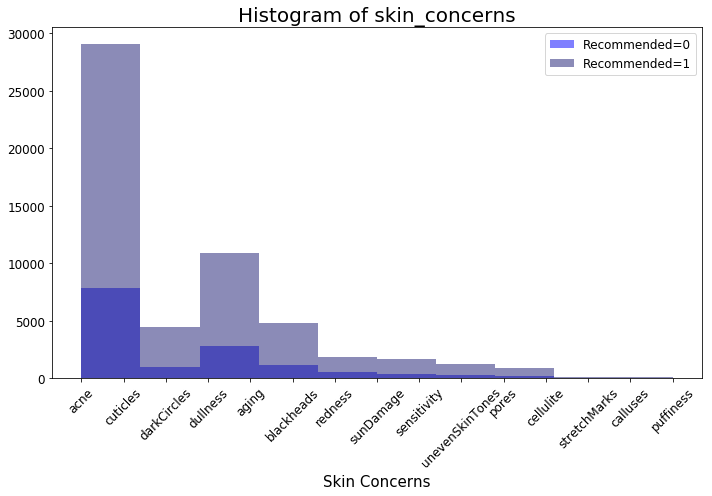

In [198]:
sephora_EDA.plot_histograms_by_outcome(df_no_na['skin_concerns'], df_no_na['recommended'], 'Recommended', 'Recommended')
plt.xlabel('Skin Concerns', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('imgs/skin_concern_rec.png');

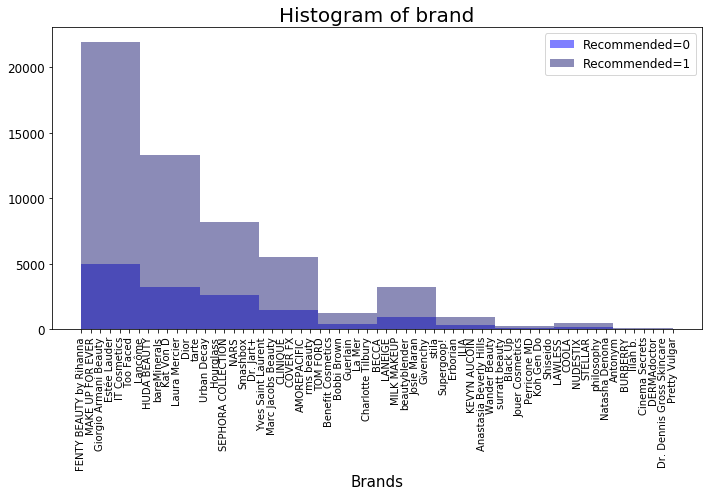

In [206]:
sephora_EDA.plot_histograms_by_outcome(df_no_na['brand'], df_no_na['recommended'], 'Recommended', 'Recommended')
plt.xlabel('Brands', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout();

In [200]:
oily_dry_df = df_no_na[(df_no_na['skin_type'] == 'oily') | (df_no_na['skin_type'] == 'dry')].copy()
oily_dry_df['skin_type'] = np.where((oily_dry_df['skin_type'] == 'oily'), 1, 0)
oily_dry_df['skin_type'].value_counts()

1    12685
0    11363
Name: skin_type, dtype: int64

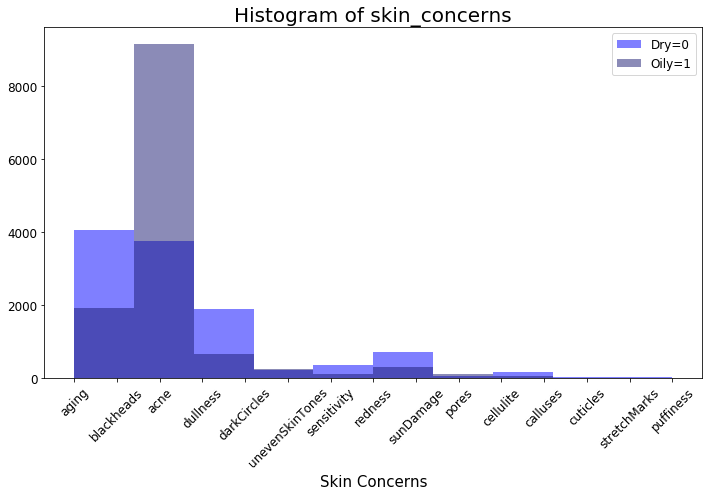

In [203]:
sephora_EDA.plot_histograms_by_outcome(oily_dry_df['skin_concerns'], oily_dry_df['skin_type'], 'Dry', 'Oily')
plt.xlabel('Skin Concerns', fontsize=15)
plt.xticks(rotation=45)
# ax.legend(['Dry', 'Oily'])
plt.tight_layout()
plt.savefig('imgs/skin_concern_skin_types.png');

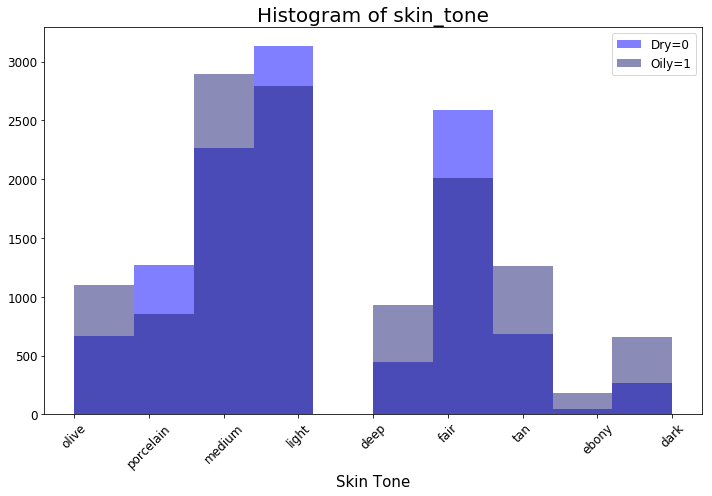

In [208]:
sephora_EDA.plot_histograms_by_outcome(oily_dry_df['skin_tone'], oily_dry_df['skin_type'], 'Dry', 'Oily')
plt.xlabel('Skin Tone', fontsize=15)
plt.xticks(rotation=45)
# ax.legend(['Dry', 'Oily'])
plt.tight_layout()
plt.savefig('imgs/skin_concern_skin_tones.png');

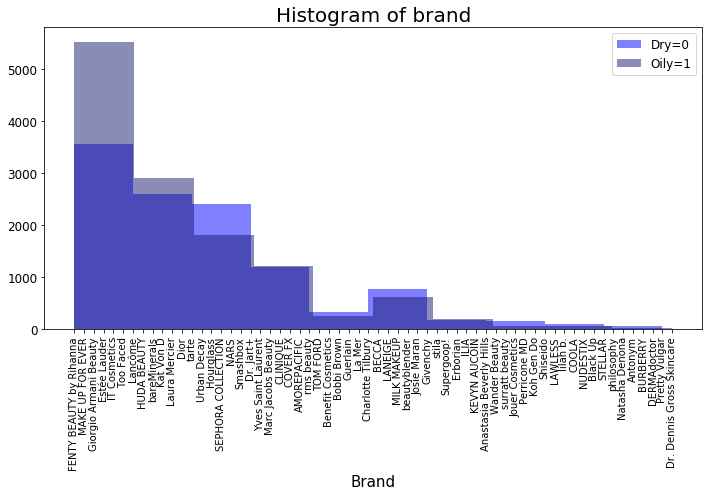

In [211]:
sephora_EDA.plot_histograms_by_outcome(oily_dry_df['brand'], oily_dry_df['skin_type'], 'Dry', 'Oily')
plt.xlabel('Brand', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.savefig('imgs/brands_hist.png');